In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

constructor_standing_data = pd.read_csv('constructor_standings.csv')
driver_standing_data = pd.read_csv('driver_standings.csv')
final_df_data = pd.read_csv('final_df.csv')
qualifying_data = pd.read_csv('qualifying.csv')
races_data = pd.read_csv('races.csv')
results_data = pd.read_csv('results.csv')
weather_data = pd.read_csv('weather.csv')

C:\Users\quoca\AppData\Local\Temp\ipykernel_18076\34732436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=popular_circuits_data, x='season', y='circuit_id', jitter=True, palette='viridis')


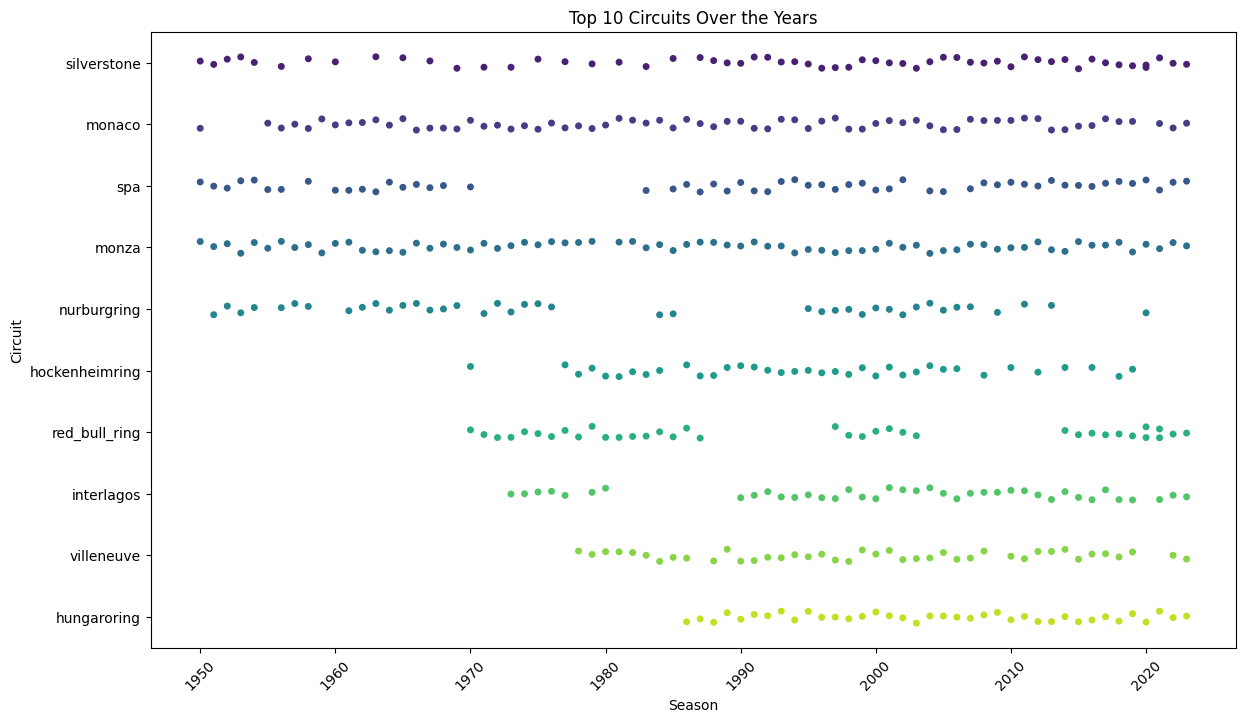

In [ ]:
circuit_counts = races_data['circuit_id'].value_counts()

most_popular_circuits = circuit_counts.nlargest(10).index

popular_circuits_data = races_data[races_data['circuit_id'].isin(most_popular_circuits)]

plt.figure(figsize=(14, 8))
sns.stripplot(data=popular_circuits_data, x='season', y='circuit_id', jitter=True, palette='viridis')
plt.title('Top 10 Circuits Over the Years')
plt.xlabel('Season')
plt.ylabel('Circuit')
plt.xticks(rotation=45)
plt.show()


In [4]:
top_ten_circuit_counts = popular_circuits_data['circuit_id'].value_counts().reindex(most_popular_circuits)
print(top_ten_circuit_counts)

circuit_id
monza             73
monaco            69
silverstone       58
spa               56
villeneuve        42
nurburgring       41
interlagos        40
hungaroring       38
hockenheimring    37
red_bull_ring     37
Name: count, dtype: int64


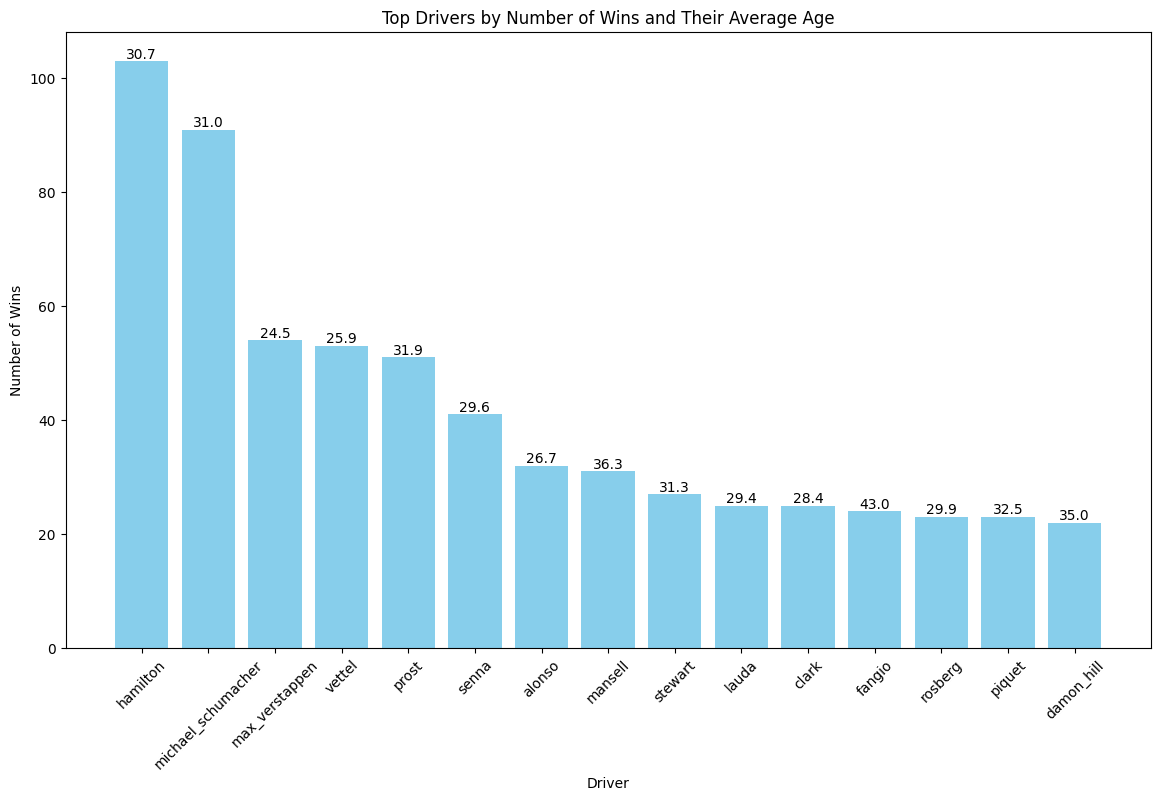

In [ ]:
results_data = pd.read_csv('results.csv')

results_data['date_of_birth'] = pd.to_datetime(results_data['date_of_birth'])

results_data['age'] = results_data.apply(lambda row: row['season'] - row['date_of_birth'].year, axis=1)

results_data['age'] = results_data['age'].round()

podium_data = results_data[results_data['podium'] <= 3]

top_drivers = podium_data[podium_data['podium'] == 1].groupby('driver').agg({'podium': 'count', 'age': 'mean'}).reset_index()
top_drivers = top_drivers.rename(columns={'podium': 'wins'})

top_drivers = top_drivers.sort_values(by='wins', ascending=False).head(15)

plt.figure(figsize=(14, 8))
plt.bar(top_drivers['driver'], top_drivers['wins'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Top Drivers by Number of Wins and Their Average Age')
plt.xticks(rotation=45)

for index, row in top_drivers.iterrows():
    plt.text(row['driver'], row['wins'], f"{row['age']:.1f}", ha='center', va='bottom')

plt.show()

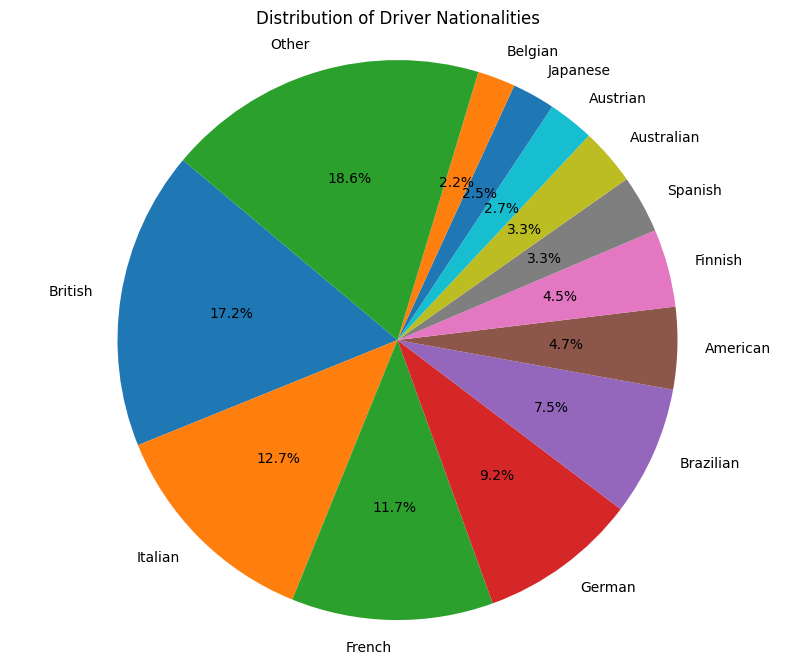

In [ ]:
nationality_counts = results_data['nationality'].value_counts(normalize=True) * 100

other_countries = nationality_counts[nationality_counts < 2]
main_countries = nationality_counts[nationality_counts >= 2]

main_countries['Other'] = other_countries.sum()

plt.figure(figsize=(10, 8))
plt.pie(main_countries, labels=main_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Driver Nationalities')
plt.axis('equal')
plt.show()

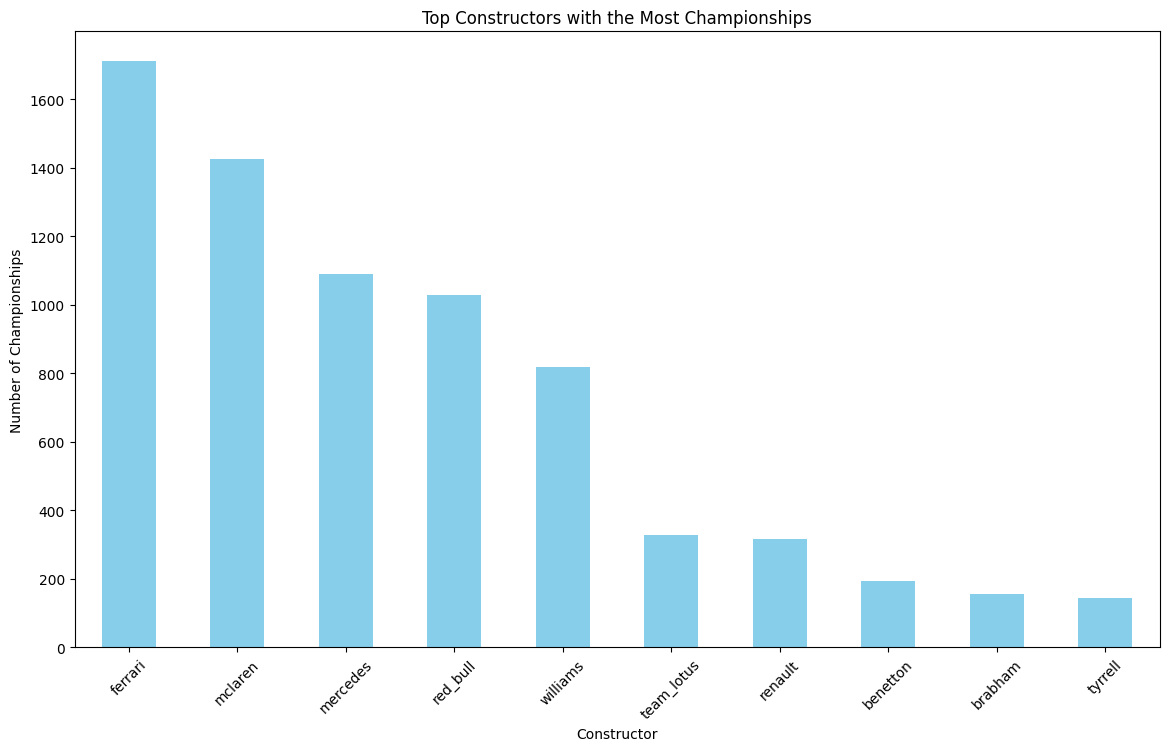

In [ ]:
constructor_championships = constructor_standing_data.groupby('constructor')['constructor_wins'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
constructor_championships.plot(kind='bar', color='skyblue')
plt.xlabel('Constructor')
plt.ylabel('Number of Championships')
plt.title('Top Constructors with the Most Championships')
plt.xticks(rotation=45)
plt.show()

C:\Users\quoca\AppData\Local\Temp\ipykernel_18076\3577202804.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['driver_age'] = data_filtered['season'] - data_filtered['date_of_birth'].dt.year


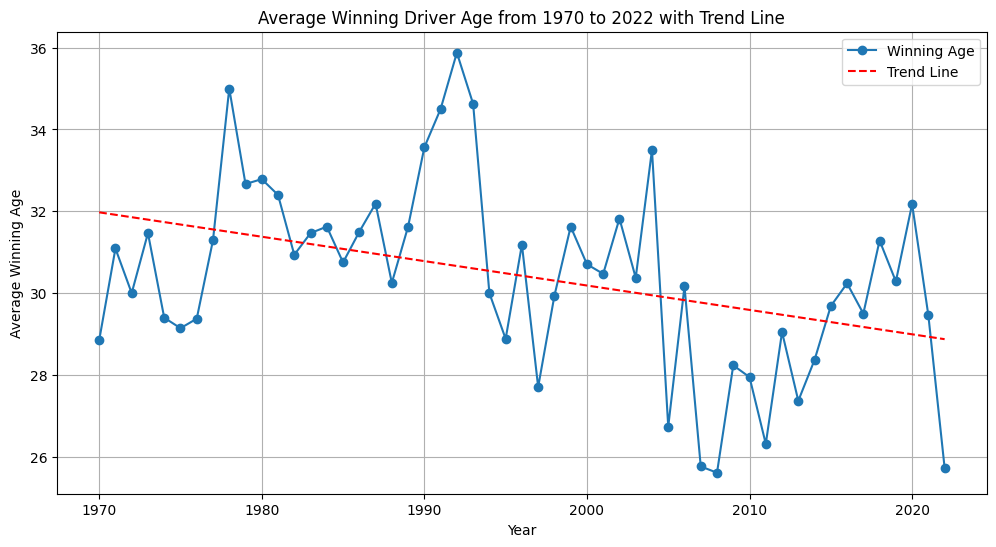

In [ ]:
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Filter the data for years 1970 to 2022 and wins (podium == 1)
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data_filtered = data[(data['season'] >= 1970) & (data['season'] <= 2022) & (data['podium'] == 1)]

data_filtered['driver_age'] = data_filtered['season'] - data_filtered['date_of_birth'].dt.year

average_winning_age = data_filtered.groupby('season')['driver_age'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_winning_age['season'], average_winning_age['driver_age'], marker='o', label='Winning Age')

z = np.polyfit(average_winning_age['season'], average_winning_age['driver_age'], 1)  # Linear fit
p = np.poly1d(z)
plt.plot(average_winning_age['season'], p(average_winning_age['season']), "r--", label='Trend Line')

plt.title("Average Winning Driver Age from 1970 to 2022 with Trend Line")
plt.xlabel("Year")
plt.ylabel("Average Winning Age")
plt.legend()
plt.grid()
plt.show()

C:\Users\quoca\AppData\Local\Temp\ipykernel_18076\773928061.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_data['simplified_weather'] = incident_data.apply(simplify_weather, axis=1)


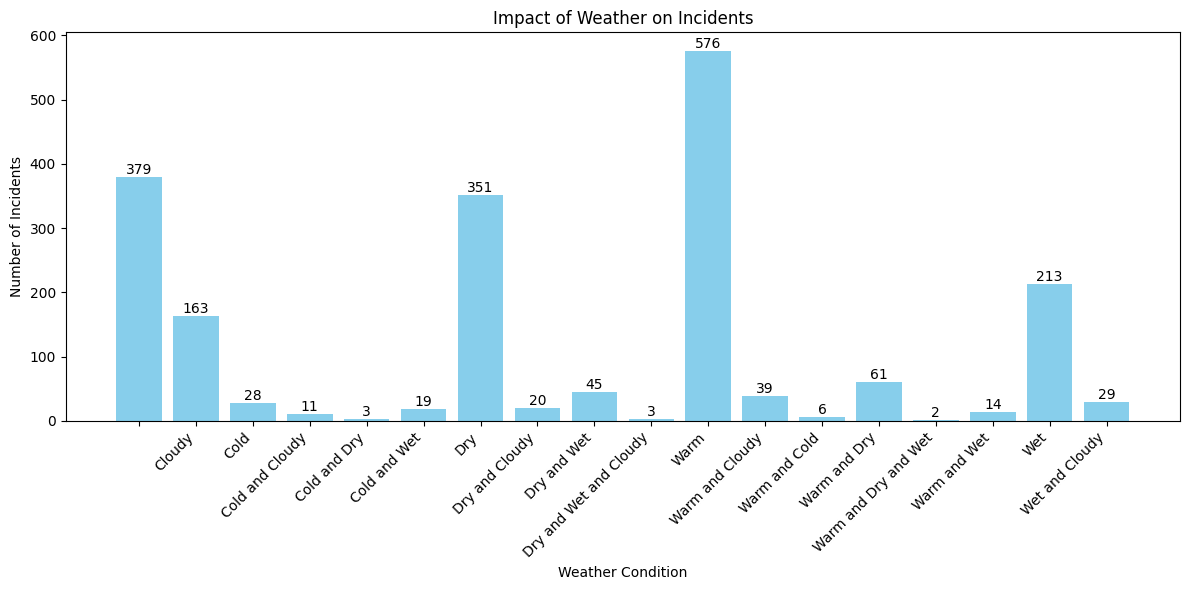

In [ ]:
merged_data = pd.merge(results_data, weather_data, on=['season', 'round'])

incident_statuses = ['Collision', 'Accident', 'Retired', 'Crashed']
incident_data = merged_data[merged_data['status'].isin(incident_statuses)]

def simplify_weather(row):
	conditions = []
	if row['weather_warm']:
		conditions.append("Warm")
	if row['weather_cold']:
		conditions.append("Cold")
	if row['weather_dry']:
		conditions.append("Dry")
	if row['weather_wet']:
		conditions.append("Wet")
	if row['weather_cloudy']:
		conditions.append("Cloudy")
	return " and ".join(conditions)

incident_data['simplified_weather'] = incident_data.apply(simplify_weather, axis=1)

weather_incidents = incident_data.groupby('simplified_weather').size().reset_index(name='incident_count')

plt.figure(figsize=(12, 6))
bars = plt.bar(weather_incidents['simplified_weather'], weather_incidents['incident_count'], color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')
plt.title('Impact of Weather on Incidents')
plt.xticks(rotation=45, ha='right') 

for bar in bars:
	height = bar.get_height()
	plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\quoca\AppData\Local\Temp\ipykernel_18076\397468740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_wet_weather['simplified_weather'] = dry_wet_weather.apply(lambda row: 'Dry' if row['weather_dry'] else 'Wet', axis=1)


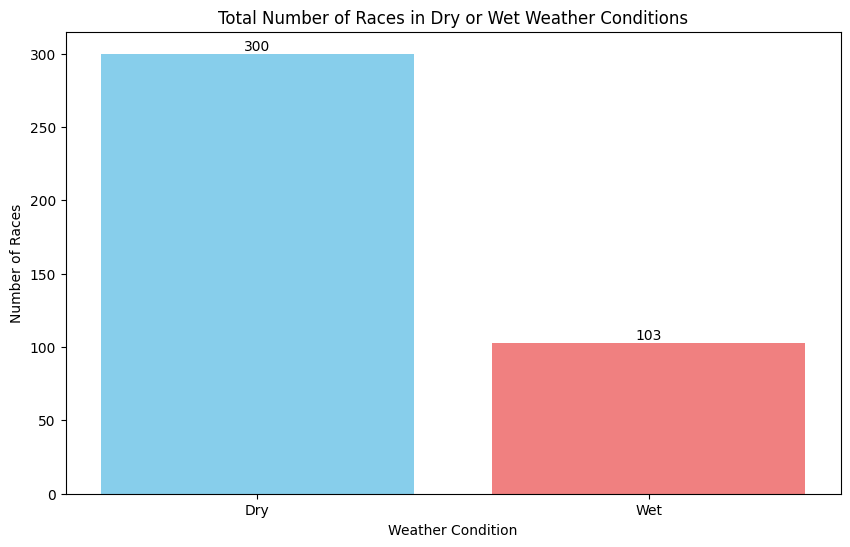

In [ ]:
dry_wet_weather = weather_data[(weather_data['weather_dry'] == True) | (weather_data['weather_wet'] == True)]

dry_wet_weather['simplified_weather'] = dry_wet_weather.apply(lambda row: 'Dry' if row['weather_dry'] else 'Wet', axis=1)

weather_race_counts = dry_wet_weather['simplified_weather'].value_counts().reset_index()
weather_race_counts.columns = ['Weather', 'Race Count']

plt.figure(figsize=(10, 6))
bars = plt.bar(weather_race_counts['Weather'], weather_race_counts['Race Count'], color=['skyblue', 'lightcoral'])
plt.xlabel('Weather Condition')
plt.ylabel('Number of Races')
plt.title('Total Number of Races in Dry or Wet Weather Conditions')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()